# **Different Types of Categorical Feature Encoding Techniques**

## **Agenda**
1. Categorical Features
2. Types of categorical Features
3. Need  of encoding techniques.
4. Types of encoding techniques.
5. Guess?

### **What are Categorical Features?**: 
Categorical features are the features having discrete values as a data(fixed). These are like categories, not numberical, it can be like textual form. For example size of t-shirt small, medium, large, XL,XXL.

There are two types of categorical feature.
1. **Nominal Categorical Features**
2. **Ordinal Categorical Features**

* A categorical variable (sometimes called a nominal variable) is one that has two or more categories, but there is no intrinsic ordering to the categories
For example  pincode, Gender, city_name etc

* If the feature have some ordering, then that feature would be an ordinal feature. For exmple grades, education etc.

Now we know that all the traditonal Machine learning algorithms takes numrical type data as a input. So we have to prepare our data accoring to these algorithms.


Based on these types of categorical features we divide our categorical encoding techniques into two types.

###**Types of Encoding** 
1. Nominal Categorical Encoding
    * One hot encoding
    * Frequency Encoding
    * Mean Encoding
    * Binary Encoding
2. Ordinal Categorical Encoding
    * Label Encoding
    * Target Encoding

Some other encoding techniques like 
* Probability ratio encoding
* Weight of evidence

Now let's understand one by one





## **1. One Hot encoding**
* This technique is applied to nominal categorical features.
* In this technique, we map each category of a nominal feature to a vector that contains 0 and 1 where 0 denoting the absence of the feature, and 1 denoting the presence of the feature. 
* The number of new columns depends on the number of unique categories present in the feature. 
This method produces a lot of columns that slows down the learning significantly if the number of the category is very high for the feature. Pandas has get_dummies function, which is quite easy to use.

### **Let's load the data on which we are going to apply the encoding techniques.**


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Projects/The A Team/HR Analytics/data_HR_analytics.csv')
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
data.shape

(54808, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


## **Identifying features.**

**Numerical Variables:**
* employee_id
* age

* length of service
* avg_training_score

**Categorical Variables.**
* department (nominal)
* region (nominal
* education (ordinal)
* gender (nominal)
* no_of_trainings (ordinal)
* previous_year_rating (ordinal)
* recruitment_channel (nominal
* KPIs_met >80%
* awards_won?
* is_promoted

Since here department is a nominal feature. So let's apply One Hot encoding to this feature. We can perform One hot encoding using pd.get_dummies function.


In [9]:
data['department'].nunique()

9

In [10]:
df = data.copy()
df = pd.get_dummies(df,columns = ['department'],drop_first= True)
df.head()

,employee_id,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,65438,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0
1,65141,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0
2,7513,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0
3,2542,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0
4,48945,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1


Here we an see that we have total of 9 unique categories in the department feature so the number of dummy variables created are 9.

### **Disadvantage**
* This is only applied when the number of categories in a nominal feature is less. 

## **2. Label Encoding**
* This encoding technique is applied to the ordinal categorical feature.
* In this encoding technique, each category is assigned a unique integer value from 1 through N (here N is the number of unique categories present in the feature).
* Higher order category will get higher value.

Now let's perform the Label Encoding on the Eduction feature which is a ordinal type.


In [11]:
df2 = data.copy()
# Label encoding.
edu_dict = {"Below Secondary":1, "Bachelor's":2,"Master's & above":3}
df2['education'] = df2['education'].map(edu_dict)
df2.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,3.0,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,2.0,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,2.0,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,2.0,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,2.0,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
# Another way of performing Label encoding is to make use of sklaern Label Encoding Class.
#Let us suppose that region is our ordinal categorical feature
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['region'] = le.fit_transform(df2['region'])
df2.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,31,3.0,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,14,2.0,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,10,2.0,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,15,2.0,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,18,2.0,m,other,1,45,3.0,2,0,0,73,0


**Observation:**
* Now we can see that education and region were assigned a unique integer value where each value assgines a weight where 1<2<3<4......
The category which assigned a greater value has gien higher importance to that category.

Note We  can also use pd.factorize method to perform label encoding.

In [ ]:
# Let us assume that recruitment_channel is a ordinal feature
df2['department_enc'] = pd.factorize(df2['department'])[0]
df2.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_enc
0,65438,Sales & Marketing,31,3.0,f,sourcing,1,35,5.0,8,1,0,49,0,0
1,65141,Operations,14,2.0,m,other,1,30,5.0,4,0,0,60,0,1
2,7513,Sales & Marketing,10,2.0,m,sourcing,1,34,3.0,7,0,0,50,0,0
3,2542,Sales & Marketing,15,2.0,m,other,2,39,1.0,10,0,0,50,0,0
4,48945,Technology,18,2.0,m,other,1,45,3.0,2,0,0,73,0,2


### **Observations:**
* The department_enc feature is now assigned with a unique integer

## **3. Frequency Encoding**
* This technique is applied to nominal categorical variable.
* It this technique we are assigning the frequency of the categories of the nominal features as labels. 
* It helps the model to understand and assign the weight in direct and inverse proportion, depending on the nature of the data. 

**Algorithm**

**Step 1** Select a categorical feature on which you have to apply frequency encoding.<br>
**Step 2** Group by the categorical feature and obtain the counts of each category in the feature<br>
**Step 3** Map these frequencies with the original data.<br>

In [12]:
def frequency_encoding(data,cat):
  '''
  data: training data
  cat: categorical feature on which we have to apply frequency encoding techniques

  returns a feature will all categoris assigned to its frequency
  '''
  
  freq_enc = data.groupby(cat).size()/len(data)
  return  data[cat].map(freq_enc)

In [13]:
df3 = data.copy()

#Applying frequency encoding to region feature
df3['region_freq'] = frequency_encoding(df3,'region')
df3.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,region_freq
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0.088363
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0.117282
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0.015947
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0.021438
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0.041235


* Frequency encoding is useful when we have nominal categorical feature with more number of feature. 
* It solves the problem of One Hot Encoding techniues.

### **Disadvantage**
* If some of the categories have same count i.e same frequency then they will map with the same frequnecy which may in turn to loose some valuable information.


## **4. Mean Encoding**
* This technique is applied to the nominal categorical feature.
* In this techniue we are assigning the mean of the categories with respect to the target variable. 
* To perform mean encoding two features are required one feature is on which we have to transform and another one is the target variable.
* Used when the number of categories is much more.

### **Algorithm**

**Step 1** Select a categorical feature  on which we have to perform mean encoding.<br>
**Step 2** Select a target feature.<br>
**Step 3** Group by the categorical feature and obtain aggregated sum over the “Target” variable.<br>
**Step 4** Map these mean values with the original data


In [ ]:
def mean_encoding(data,tar,cat):
  '''
  data: training data
  cat: categorical feature on which we have to apply frequency encoding techniques
  tar: target variable

  returns a feature will all categories assigned to its mean value
  '''
  data[tar] = data[tar].astype('int')
  mean_enc = data.groupby(cat)[tar].mean()
  return data[cat].map(mean_enc)

In [ ]:
# Applying mean encoding to region feature
df4 = data.copy()
df4['region_mean'] = mean_encoding(df4,'is_promoted','region')
df4.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,region_mean
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0.106546
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0.114188
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0.060641
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0.116596
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0.063274


* This techniques solves the problem of the frequency encoding.
* This encoding method brings out the relation between similar categories, but the connections are bounded within the categories and target itself. 
* The advantages of the mean target encoding are that it does not affect the volume of the data and helps in faster learning. 

## **5. Target Encoding**
* This technique is applied to ordinal categorical features.
* This techniques is vey similar to mean encoding.
* After calculating the mean of all the categories with respect to target feature instead of mapping the mean to the original data we are mapping the unque integer values to the mean. For example higher mean with higher number. Now the original categories are mapped with integers. 


**Note** - Mean encoding and target encoding is widely used in the competitions to improve the performance of the model.

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 3.5MB/s 


In [ ]:
# Applying target encoding to our ordinal feature 'education' 
from category_encoders import TargetEncoder
df5 = data.copy()

targ_enc = TargetEncoder()
df5['edu_tar_enc']= targ_enc.fit_transform(df5['education'],df5['is_promoted'])
df5.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,edu_tar_enc
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0.098559
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0.082031
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0.082031
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0.082031
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0.082031


### **Limitations of Target Encoding and Mean Encoding**
Target encoding is dependent on the distribution of the target which means target encoding requires careful validation as it can be prone to overfitting. This method is also dataset-specific and will only show significant improvements some of the time.

## **6. Weight of Evidence**
Weight of Evidence (WoE) is a measure of the “strength” of a grouping technique to separate good and bad. This method was developed primarily to build a predictive model to evaluate the risk of loan default in the credit and financial industry. Weight of evidence (WOE) is a measure of how much the evidence supports or undermines a hypothesis.

It is computed as below:
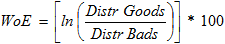

* WoE will be 0 if the
<center> P(Goods) / P(Bads) = 1</center>
* If P(Bads) > P(Goods) the odds ratio will be < 1 and the WoE will be < 0
* If P(Goods) > P(Bads) in a group, then WoE > 0.

### **Algorithm**
1. For each label, we calculate the mean of target=1, that is the probability of being 1 ( P(1) ),
2. Now we calculate the mean of the probability of the target=0 ( P(0) ).
3. And then, we calculate the ratio P(1)/P(0) 
4. Now take a log of step3 and multiple by 100.

**Note-**We need to add a minimal value with P(0) to avoid any divide by zero scenarios where for any particular category, there is no target=0.



In [ ]:
def woe_encoding(data,tar,cat):

  woe_enc = data.groupby(cat)[tar].mean() #This will be a probability ratio of is_promoted ==1
  woe_1 = woe_enc
  woe_0 = 1-woe_1+0.0000001 #This will be a probability ratio of is_promoted ==0
  woe = np.log(woe_1/woe_0)*100
  return data[cat].map(woe)

In [ ]:
df6 = data.copy()
# Applying woe encoding on department feature.
df6['department_woe'] = woe_encoding(df6,'is_promoted','department')
df6.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_woe
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,-255.590367
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,-231.182876
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,-255.590367
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,-255.590367
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,-211.556513


## **Advantages of Weight of Evidence Encoding**
* It can transform an independent variable so that it establishes a monotonic relationship to the dependent variable.
* For variables with too many (sparsely populated) discrete values, these can be grouped into categories (densely populated), and the WoE can be used to express information for the whole category.
* The (univariate) effect of each category on the dependent variable can be compared across categories and variables because WoE is a standardized value

## **Disadvantages of weight of Evidence.**
* WOE encoding is dependent on the distribution of the target which means this  encoding technique requires careful validation as it can be prone to overfitting. This method is also dataset-specific and will only show significant improvements some of the time.

## **7. Probability Ratio Encoding**
* Can we applied only to nominal feauture.
* Probability Ratio Encoding is similar to Weight Of Evidence(WoE), with the only difference is the only ratio of True and False probability is used.

### **Algorithms**
Probability ratio Encoding approach is as follows:
1. For each label, we calculate the mean of target=1, that is the probability of being 1 ( P(1) ),
2. Now we calculate the mean of the probability of the target=0 ( P(0) ).
3. And then, we calculate the ratio P(1)/P(0) 

**Note-**We need to add a minimal value with P(0) to avoid any divide by zero scenarios where for any particular category, there is no target=0.


In [ ]:
def prob_ratio_encoding(data,tar,cat):

  p_r_enc = data.groupby(cat)[tar].mean() #This will be a probability of is_promoted ==1
  p_r_1 = p_r_enc
  p_r_0 = 1-p_r_1 + 0.000001 #This will be a probability of is_promoted ==0
  prob_ratio = p_r_1/p_r_0
  return data[cat].map(prob_ratio)

In [ ]:
df7 =data.copy()
# Let's apply a probability ratio encoding to region feature.
df7['region_p_r'] = prob_ratio_encoding(df7,'is_promoted','region')
df7.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,region_p_r
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0.119251
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0.128907
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0.064555
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0.131984
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0.067548


### **Disadvantage**
* Same as woe encoding. Prone to overfitting

## **Binary Encoding**
* Applied to nominal categorical feauture.
* Binary encoding converts a category into binary digits. Each binary digit creates one feature column. 
* If there are n unique categories, then binary encoding results in the only log(base 2)ⁿ features.
### **Algorithms**
For Binary encoding is as follows:

1. The categories are first converted to numeric order starting from 1 (order is created as categories appear in a dataset and do not mean any ordinal nature)
2. Then those integers are converted into binary code, so for example 3 becomes 011, 4 becomes 100
3. Then the digits of the binary number creates separate features like dummy variables.


In [ ]:
df8 = data.copy()
df8['region'].nunique()

34

In [14]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
from category_encoders import BinaryEncoder
be = BinaryEncoder()
df_8 = be.fit_transform(df8['region'])
df8 = pd.concat([df8,df_8],axis = 1)
df8.head(34)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,region_0,region_1,region_2,region_3,region_4,region_5,region_6
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0,0,0,0,0,1,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0,0,0,0,0,1,1
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0,0,0,0,1,0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0,0,0,0,1,0,1
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0,0,0,0,0,1,1,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0,0,0,0,0,1,1,1
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0,0,0,0,1,0,0,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0,0,0,0,0,1,1,1
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0,0,0,0,1,0,0,1


In [ ]:
df8['region_0'].nunique()

1

In [16]:
df9 =data.copy()
df9['gender'] = df9['gender'].replace({'m': 1, 'f':0})

## **Observations:**
* We have checked the region_0 has only one value so we can drop this feautre.

In [17]:
df9.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0


# <center>**--------------------Thank You!--------------------**